In [11]:
''' Latin hypercube design
Installation: pip install --upgrade pyDOE
https://pythonhosted.org/pyDOE/randomized.html

import sys
!{sys.executable} -m pip install --upgrade pyDOE

'''
import numpy as np
from matplotlib import pyplot as plt
import pyDOE as pyDOE

def rescale01(xmin, xmax, f):
    return (f - xmin) / (xmax - xmin)

np.random.seed(42)


In [12]:
num_evals = [32, 64, 128, 256, 512, 1024][0]  ## Total number of evaluations for training the emulator
num_para = [3, 4, 5, 6, 7][0]
design = ['latin', 'random', 'grid'][0]

In [21]:
#### Parameters -- replace this and the limits #####

####  para = np.linspace(lower_lim, upper_lim, total_eval)

para1 = np.linspace(0.0, 0.62036, num_evals)  #OmegaM
para2 = np.linspace(0.1841, 0.4159, num_evals) #Omegab
para3 = np.linspace(1.2886, 2.9114, num_evals) # sigma8

allPara = np.vstack([para1, para2, para3])

In [24]:

def latinhyp(allParams, paramOutfile):
    lhd = pyDOE.lhs(allParams.shape[0], samples=num_evals, criterion=None) # c cm corr m
    print(lhd)
    # lhd = norm(loc=0, scale=1).ppf(lhd)  # this applies to both factors here
    idx = (lhd * num_evals).astype(int)

    allCombinations = np.zeros((num_evals, allParams.shape[0]))
    for i in range(allParams.shape[0]):
        allCombinations[:, i] = allParams[i][idx[:, i]]

        np.savetxt(paramOutfile, allCombinations)
        print(allCombinations)
        
        
Outfile = design + '_para' + str(num_para) + '_total' + str(num_evals)
latinhyp(allPara,  Outfile + '.txt' )
        

[[0.83178949 0.99277868 0.24814162]
 [0.20035021 0.20633693 0.49218471]
 [0.4240338  0.54305783 0.52269128]
 [0.01200631 0.57035758 0.10091859]
 [0.93470223 0.76314174 0.13312343]
 [0.28383589 0.07298938 0.0286017 ]
 [0.35876157 0.71301205 0.61740622]
 [0.99506536 0.48544832 0.27872427]
 [0.86364514 0.10588339 0.62569327]
 [0.67181766 0.80640765 0.16499261]
 [0.06583613 0.32535172 0.29848712]
 [0.26301997 0.22113126 0.77452088]
 [0.89769991 0.84313946 0.83150275]
 [0.55490879 0.43792725 0.35552309]
 [0.52853643 0.6211944  0.5387839 ]
 [0.11396401 0.96238974 0.33680007]
 [0.22291204 0.74349431 0.92261257]
 [0.60022586 0.38728092 0.43985497]
 [0.69711804 0.91556123 0.0678025 ]
 [0.72151276 0.51828592 0.19596743]
 [0.44168288 0.03305825 0.57108537]
 [0.56890767 0.40823474 0.84659382]
 [0.76500144 0.37454019 0.40091138]
 [0.49036607 0.26816133 0.04357881]
 [0.80123004 0.13626078 0.97081987]
 [0.31765107 0.0230344  0.88909095]
 [0.39842432 0.15725987 0.71774918]
 [0.95930131 0.63339602 0.80

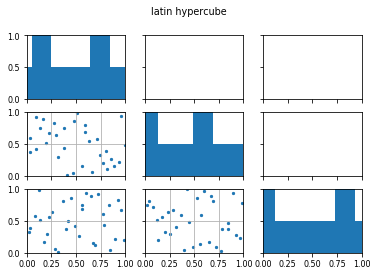

In [26]:
##
f, a = plt.subplots(AllPara.shape[0], AllPara.shape[0], sharex=True, sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.rcParams.update({'font.size': 8})
plt.suptitle('latin hypercube')
for i in range(AllPara.shape[0]):
    for j in range(i+1):
#         print(i,j)
        if(i!=j):
            a[i, j].scatter(lhd[:, i], lhd[:, j], s=5)
            a[i, j].grid(True)
        else:
            # a[i,i].set_title(AllLabels[i])
            # a[i, i].text(0.4, 0.4, AllLabels[i], size = 'xx-large')
            hist, bin_edges = np.histogram(lhd[:,i], density=True, bins=64)
            # a[i,i].bar(hist)
            a[i,i].bar(bin_edges[:-1], hist/hist.max(), width=0.2)
            plt.xlim(0,1)
            plt.ylim(0,1)


plt.savefig('Plots/' + Outfile + '.png', figsize=(10, 10))
plt.show()

[[0.34019742 0.33364839 1.65503871]
 [0.22012774 0.19157742 1.91678065]
 [0.14008129 0.40094516 2.75435484]
 [0.26015097 0.20653226 2.07382581]
 [0.         0.28130645 1.81208387]
 [0.54031355 0.29626129 2.02147742]
 [0.40023226 0.25139677 1.7073871 ]
 [0.62036    0.30373871 1.44564516]
 [0.02001161 0.28878387 2.70200645]
 [0.10005806 0.31121613 1.55034194]
 [0.04002323 0.34112581 1.75973548]
 [0.4602671  0.21400968 2.17852258]
 [0.44025548 0.31869355 2.23087097]
 [0.30017419 0.4159     1.96912903]
 [0.42024387 0.23644194 2.85905161]
 [0.56032516 0.2214871  2.33556774]
 [0.20011613 0.35608065 1.2886    ]
 [0.58033677 0.19905484 2.4926129 ]
 [0.52030194 0.24391935 2.80670323]
 [0.48027871 0.27382903 2.64965806]
 [0.08004645 0.39346774 2.38791613]
 [0.06003484 0.3785129  2.44026452]
 [0.38022065 0.1841     2.54496129]
 [0.32018581 0.22896452 1.49799355]
 [0.12006968 0.36355806 2.9114    ]
 [0.36020903 0.34860323 1.39329677]
 [0.24013935 0.37103548 1.34094839]
 [0.18010452 0.25887419 1.60